In [1]:
import numpy as np

In [2]:
degree = 13
X_train = np.random.rand(15,10)
dlist = [[1]*X_train.shape[0]] + list(map(lambda n: X_train**n, range(1, degree + 1)))

In [3]:
import matplotlib.pyplot as plt

In [4]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [5]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

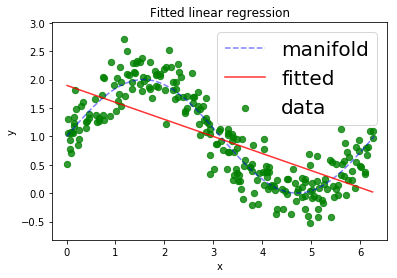

In [6]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

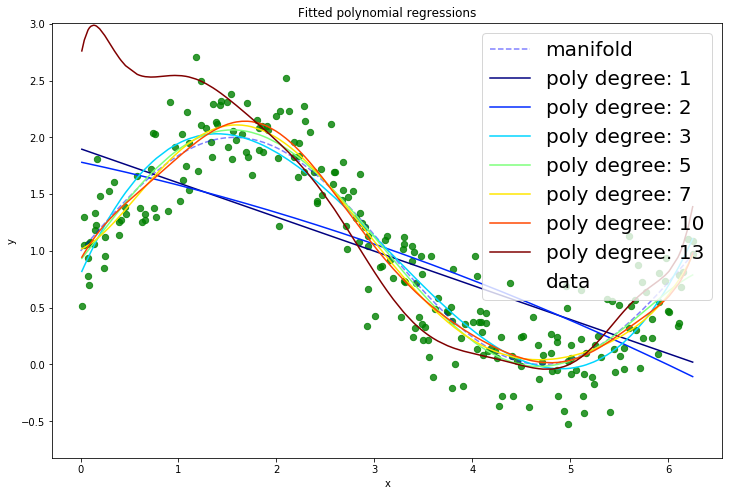

In [7]:
degree_list = [1, 2, 3, 5, 7, 10, 13]
plt.figure(figsize=(12,8))
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
err = []

for ix, degree in enumerate(degree_list):
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + \
                list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [8]:
X.shape

(250, 14)

In [9]:
import itertools as it
import matplotlib.cm as cm

In [10]:
data = generate_wave_set(1000, 100)
X = np.vstack((np.ones(data['x_train'].shape[0]), data['x_train'])).T
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

/Users/artem/miniconda3/envs/odscourse/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


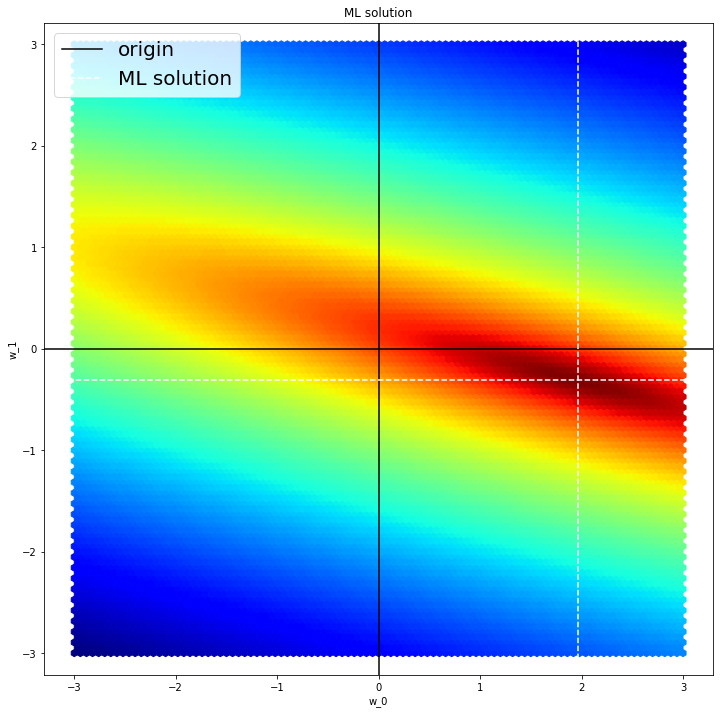

In [11]:
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
# create cartesian product of parameters
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
# calculate MSE on dataset for each pairs of parameters
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)
plt.figure(figsize=(12,12))
plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
plt.axes().set_aspect('equal', 'datalim')
plt.title('ML solution')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

In [12]:
from tqdm import tqdm

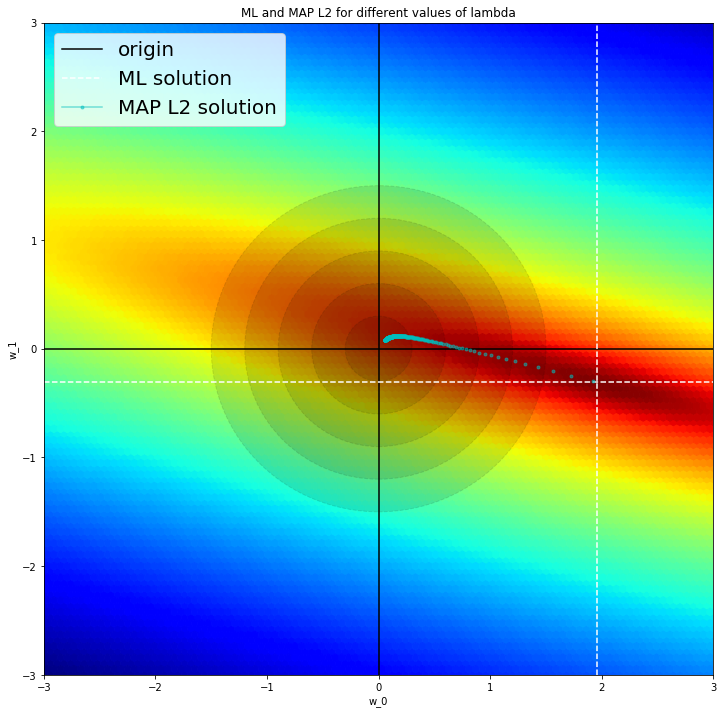

In [13]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
plt.figure(figsize=(12,12))
# solve L2 problems for different values of 
w_l2 = {}
lmbd_space = np.linspace(0.5, 1500, 500)
for lmbd in lmbd_space:
    w_l2[lmbd] = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)


plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
# plot prior distribution of parameters
for i in range(1, 6):
    plt.gcf().gca().add_artist(plt.Circle((0, 0), i*0.3, color='black', linestyle='--', alpha=0.1))
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
# plot MAP solutions
flag = True
for _, w_l2_solution in w_l2.items():
    plt.plot(w_l2_solution[0], w_l2_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L2 solution' if flag else None)
    flag = False
#plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L2 for different values of lambda')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

In [14]:
def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

In [15]:
w_l1 = {}
lmbd_space = np.linspace(0.001, 2, 200)
for lmbd in tqdm(lmbd_space):
    w_l1[lmbd] = fit_lr_l1(X, data['y_train'], lmbd, n_iter=10000, lr=0.001)[0]

w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)

100%|██████████| 200/200 [00:38<00:00,  5.36it/s]


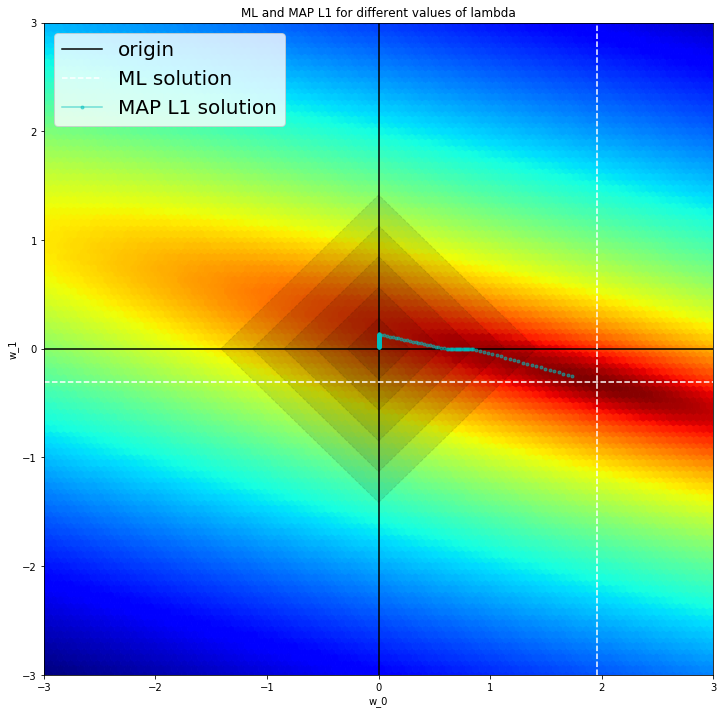

In [16]:
plt.figure(figsize=(12,12))
plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')

# function to plot rhomb
def plot_rhomb(cx=0, cy=0, r=0.5):
    plt.gcf().gca().add_artist(plt.Rectangle((cx, cy - np.sqrt(2*r**2)), 2*r, 2*r, angle=45, 
                                             color='black', linestyle='--', alpha=0.1))
# plot Laplace distribution density
for i in range(1, 6):
    plot_rhomb(r=0.2*i)
plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
# plot MAP solutions
flag = True
for _, w_l1_solution in w_l1.items():
    plt.plot(w_l1_solution[0], w_l1_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L1 solution' if flag else None)
    flag = False

#plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L1 for different values of lambda')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

In [17]:
from functools import reduce

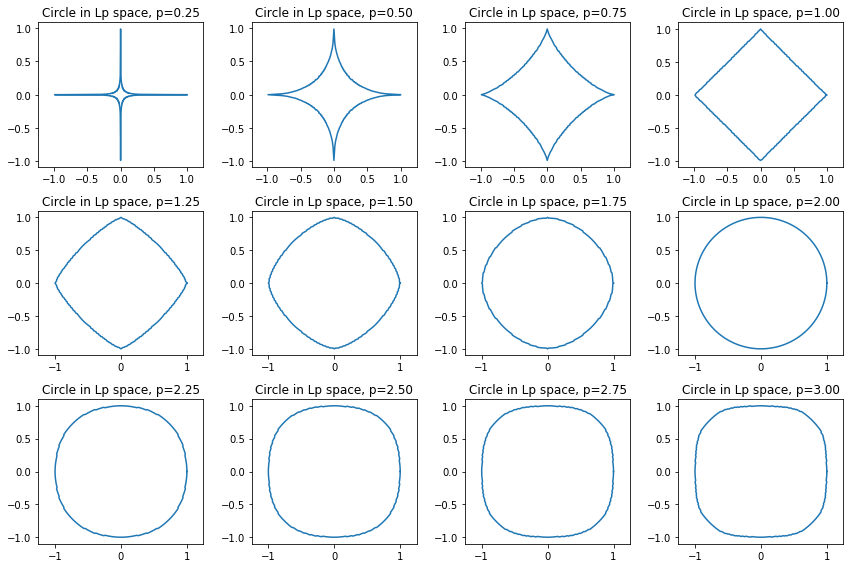

In [18]:
f, ax = plt.subplots(3, 4, figsize=(12,8))
ax = reduce(lambda a, b: a + b, ax.tolist())

a_list = np.linspace(0, 2*np.pi, 361)
r_list = np.linspace(0, 1.1, 100)

for ix, p in enumerate(np.linspace(0.25, 3, 12)):
    points = []
    for a in a_list:
        r_inner = []
        for r in r_list:
            if np.linalg.norm([r*np.cos(a), r*np.sin(a)], p) > 1:
                break
            r_inner.append(r)
        r = max(r_inner)
        points.append([r*np.cos(a), r*np.sin(a)])
    points = np.array(points)
    
    ax[ix].plot(points[:, 0], points[:, 1])
    ax[ix].set_aspect('equal', 'datalim')
    ax[ix].set_title('Circle in Lp space, p=%0.2f' % p)

f.tight_layout();